In [1]:
# clean data func
import re
import gensim

def clean_data(val):
    "Remove chars that are not letters or numbers, downcase, then remove stop words"
    global cnt, lenght
    # print(val, lenght)
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    gensim.parsing.preprocessing.remove_stopwords(sentence)
    return sentence

/Users/alinakrivolapova/projects/my_ds_project/venv/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
# read and clean initial data
import pandas as pd

header_list = ["sentiment", "text"]
initial_data = pd.read_csv('./finantial_news_data.csv', names = header_list)
initial_data = initial_data.dropna(how="any")
initial_data['text'] = initial_data['text'].apply(clean_data)


In [3]:
initial_data

,sentiment,text
0,neutral,according to gran the company has no plans to...
1,neutral,technopolis plans to develop in stages an area...
2,negative,the international electronic industry company ...
3,positive,with the new production plant the company woul...
4,positive,according to the company s updated strategy fo...
...,...,...
4841,negative,london marketwatch share prices ended lower i...
4842,neutral,rinkuskiai s beer sales fell by 65 per cent to...
4843,negative,operating profit fell to eur 354 mn from eur 6...
4844,negative,net sales of the paper segment decreased to eu...


In [4]:
# save cleaned data
with open("./cleaned_initial_data.csv","w") as file:
    for x,y in zip(initial_data['sentiment'], initial_data['text']):
        file.writelines(','.join([x,y]) + '\n')

2021-07-03 14:06:34,666 : INFO : collecting all words and their counts
2021-07-03 14:06:34,667 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-07-03 14:06:34,703 : INFO : collected 12333 word types from a corpus of 99629 raw words and 4846 sentences
2021-07-03 14:06:34,704 : INFO : Creating a fresh vocabulary
2021-07-03 14:06:34,732 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=3 retains 3711 unique words (30.090002432498174%% of original 12333, drops 8622)', 'datetime': '2021-07-03T14:06:34.718920', 'gensim': '4.0.1', 'python': '3.8.2 (v3.8.2:7b3ab5921f, Feb 24 2020, 17:52:18) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.7-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2021-07-03 14:06:34,734 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=3 leaves 89247 word corpus (89.57933934898473%% of original 99629, drops 10382)', 'datetime': '2021-07-03T14:06:34.734165', 'gensim': '4.0.1', 'python': '3.8.2 (v3.8.2:7b3ab

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3711 samples in 0.001s...
[t-SNE] Computed neighbors for 3711 samples in 0.362s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3711
[t-SNE] Computed conditional probabilities for sample 2000 / 3711
[t-SNE] Computed conditional probabilities for sample 3000 / 3711
[t-SNE] Computed conditional probabilities for sample 3711 / 3711
[t-SNE] Mean sigma: 0.017493
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.944092
[t-SNE] KL divergence after 300 iterations: 1.277821
t-SNE done! Time elapsed: 5.799820184707642 seconds


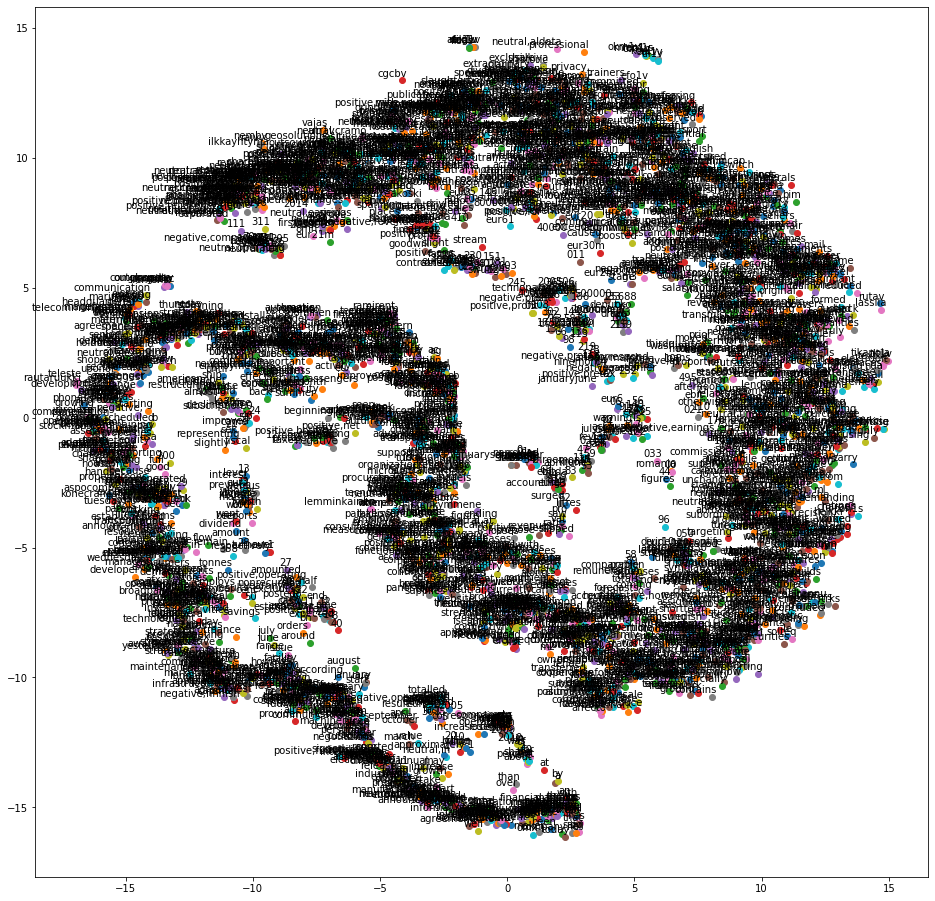

In [5]:
import logging
import multiprocessing
import time
import gensim
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

# https://habr.com/en/company/mailru/blog/417767/

# add logging to check errors during learning
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# use train data (pre-checked manually)
data = gensim.models.word2vec.LineSentence('cleaned_initial_data.csv')
# learning
# size of space 200, number of words in line 5, min frequency 3
model = Word2Vec(data, vector_size=200, window=5, min_count=3, workers=multiprocessing.cpu_count())
model.save("model.w2v")

# visualization
# https://habr.com/en/post/267041/
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

labels = []
tokens = []

for word in model.wv.index_to_key:
    tokens.append(model.wv.get_vector(word))
    labels.append(word)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(tokens)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

x = []
y = []
for value in tsne_results:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16))
for i in range(len(x)):
    plt.scatter(x[i], y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

In [6]:
# filter real data
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
header_list.reverse()
real_data = pd.read_csv('./mydump.csv', names=header_list)
# cannot drop empty data because of empty column
#real_data = real_data.dropna(how="any")  
real_data['text'] = real_data['text'].apply(clean_data)


In [7]:
real_data

,text,sentiment
0,elon musk moves in mysterious ways so it would...,NaN
1,the price of bitcoin hit a threeweek high on m...,NaN
2,the us securities watchdog told tesla last yea...,NaN
3,german police are investigating whether a fire...,NaN
4,the driver of a tesla car in a fatal crash tha...,NaN
...,...,...
139,spacex has completed its last big test of its ...,NaN
140,tesla shares have soared 40 in two days after ...,NaN
141,followers of elon musk are used to big claims ...,NaN
142,elon musks spaceships to mars can wait his tes...,NaN


In [18]:
[len(x) for x in real_data['text']]
len(real_data['text'][0])
real_data['text'][0]
print(real_data['text'].str.len())
print(sum(real_data['text'].str.len()))

0      4386
1      4087
2      2459
3      1322
4      4191
       ... 
139    4811
140    5313
141    6107
142    4514
143    7229
Name: text, Length: 144, dtype: int64
619393


<AxesSubplot:>

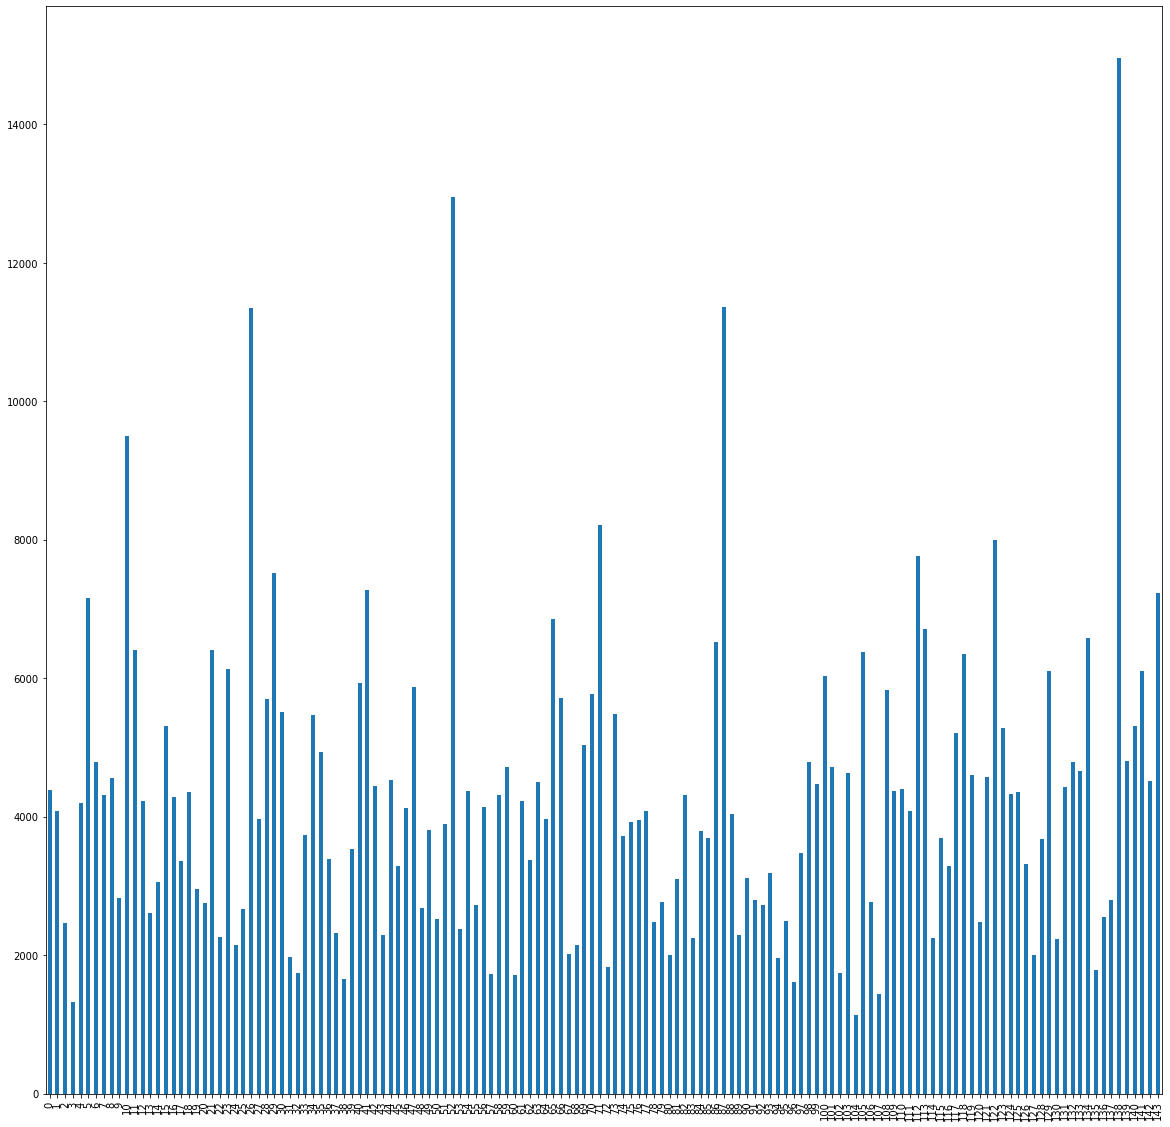

In [9]:
# find the size of vector which covers most cases
import matplotlib.pyplot as plt

# all lines lenght
plt.figure(figsize=(20, 20))
real_data['text'].str.len().plot(kind="bar")

Text(0, 0.5, 'frequency')

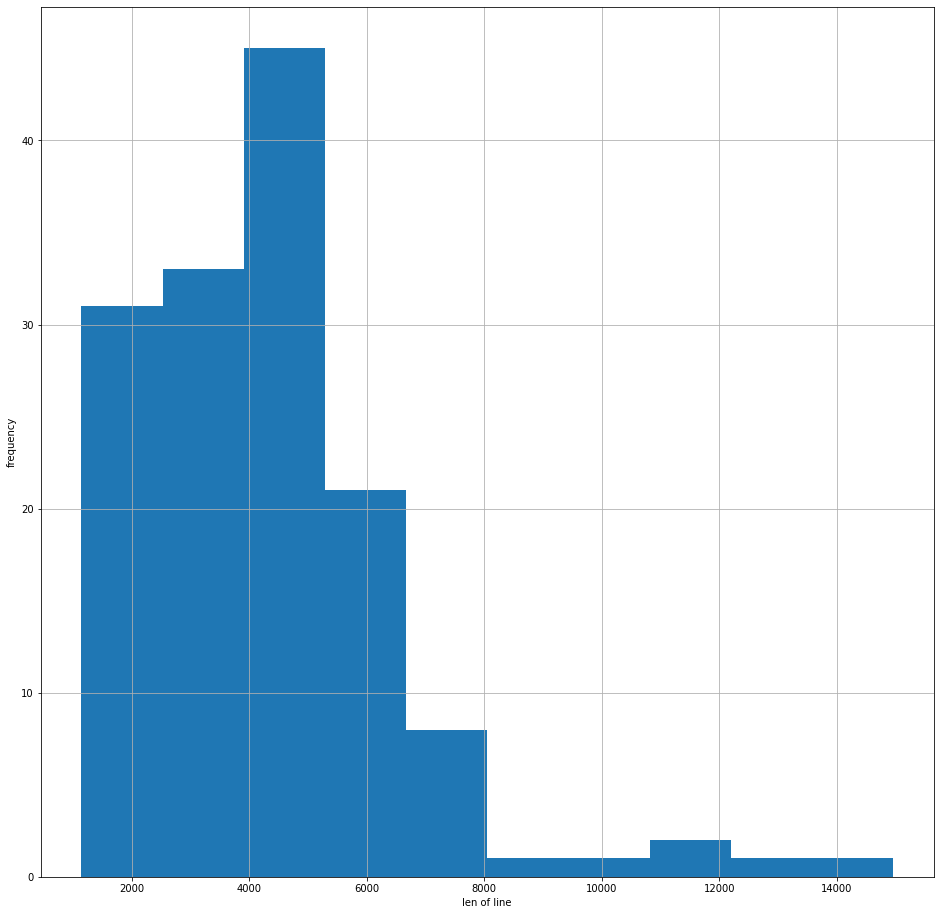

In [10]:
# len frequency
plt.figure(figsize=(16, 16))

ax = real_data['text'].str.len().hist()
ax.set_xlabel("len of line")
ax.set_ylabel("frequency")

In [19]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# matrix heigh (max words count)
# based on plot above
SENTENCE_LENGTH = 6000 
# dict size 
# sum of all words counted above 619393 - how to find NUM
NUM = 100000

def get_sequences(tokenizer, x):
    sequences = tokenizer.texts_to_sequences(x)
    return pad_sequences(sequences, maxlen=SENTENCE_LENGTH)

# create and train tokenizer
tokenizer = Tokenizer(num_words=NUM)
tokenizer.fit_on_texts(initial_data)

# reflect each text into token ids array
x_train_seq = get_sequences(tokenizer, initial_data)
x_test_seq = get_sequences(tokenizer, real_data)

In [13]:
# from keras.layers import Input
# from keras.layers.embeddings import Embedding

# news_input = Input(shape=(SENTENCE_LENGTH,), dtype='int32')
# news_encoder = Embedding(NUM, 100, input_length=SENTENCE_LENGTH,
#                           weights=[embedding_matrix], trainable=False)(news_input)

NameError: name 'embedding_matrix' is not defined